In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Dropout
from keras.callbacks import LearningRateScheduler
import keras
from mnist import MNIST  # this is for loading emnist as input data
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
import numpy as np
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

In [2]:
class LeNet:
    @staticmethod
    def build():
        # initialize the model
        model = Sequential() 
        model.add(Conv2D(20, 5, padding="same", input_shape=(28, 28, 1)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Conv2D(50, 5, padding="same"))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # define the first FC => ACTIVATION layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        # define the second FC layer
        model.add(Dense(len(FILTER)))
        # lastly, define the soft-max classifier
        model.add(Activation("softmax")) 
        model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=["accuracy"])
        return model

In [3]:
class Improved_LeNet:
    @staticmethod
    def build():
        model = Sequential()

        model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
        model.add(BatchNormalization())
        model.add(Conv2D(32, kernel_size = 3, activation='relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(64, kernel_size = 3, activation='relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, kernel_size = 3, activation='relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(128, kernel_size = 4, activation='relu'))
        model.add(BatchNormalization())
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(len(FILTER), activation='softmax'))

        # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
        model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
        return model

In [4]:
class AlexNet:
    @staticmethod
    def build():
        model = Sequential()

        # 1st Convolutional Layer
        model.add(Conv2D(filters=32, input_shape=(28, 28, 1), kernel_size=(3, 3), strides=(1, 1), padding='valid'))
        model.add(Activation('relu'))
        # Max Pooling
        model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

        # 2nd Convolutional Layer
        model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
        model.add(Activation('relu'))
        # Max Pooling
        model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

        # 3rd Convolutional Layer
        model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
        model.add(Activation('relu'))

        # 4th Convolutional Layer
        model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
        model.add(Activation('relu'))

        # Max Pooling
        model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

        # Fully Connected layer
        model.add(Flatten())
        # 1st Fully Connected Layer
        model.add(Dense(512))
        model.add(Activation('relu'))
        # Add Dropout to prevent overfitting
        model.add(Dropout(0.3))

        # Output Layer
        # important to have dense 10, since we have 10 classes
        model.add(Dense(len(FILTER)))
        model.add(Activation('softmax'))
        # Compile the model
        model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
        return model

In [5]:
LABELS = {
    0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 'A', 11: 'B',
    12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'l', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R',
    28: 'S', 29: 'T', 30: 'u', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z',
    36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n',
    44: 'q', 45: 'r', 46: 't'
}

FILTER = [0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 19, 20, 28, 31, 33, 36, 37, 38, 39, 40, 41, 42]


def get_label(val):
    if val not in LABELS:
        return val
    return LABELS[val]


In [6]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1) 

In [7]:
alex_model = AlexNet.build()
lenet_model = LeNet.build()
improved_lenet_model = Improved_LeNet.build()

In [8]:
alex_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        1

In [9]:
lenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)             

In [10]:
improved_lenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)       

In [11]:
def shapex(X):
    XX = np.empty_like(X)
    for i, XY in enumerate(X):
        img = XY.astype(np.uint8)
        img[img < 125] = 0
        img[img >= 125] = 255  
        img = img.reshape(28, 28, 1)
        XX[i] = img
    return XX

In [12]:
def normalize_labels(label_filter, array): 
    labels = []
    for a in array:
        for i, l in enumerate(label_filter):
            if a == l:
                labels.append(i)
                break
    return labels

In [15]:
def load_dataset(label_filter):
    num_classes = len(label_filter)
    emnist = MNIST('path-to-emnist_data')
    emnist.select_emnist('balanced')
    x_train, y_train = emnist.load_training()
    x_test, y_test = emnist.load_testing()

    # Filter
    # Digits: 0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8
    # Figures: 13:'D', 19:'J',20:'K', 28:'S', 31:'V'
    # Squares: 12:'C', 36:'a',37:'b',38:'d',39:'e',40:'f',41:'g',42:'h'

    train_mask = np.isin(y_train, label_filter)
    test_mask = np.isin(y_test, label_filter)
    # images, labels
    x_train, y_train = np.array(x_train)[train_mask], np.array(y_train)[train_mask]
    x_test, y_test = np.array(x_test)[test_mask], np.array(y_test)[test_mask]

    y_train = normalize_labels(label_filter, y_train)
    y_test = normalize_labels(label_filter, y_test)

    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    
    x_train = shapex(x_train)
    x_test = shapex(x_test)    

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    x_train = x_train.astype('float32')/255.0
    x_test = x_test.astype('float32')/255.0
    return [x_train, y_train, x_test, y_test]


In [16]:
x_train, y_train, x_test, y_test = load_dataset(FILTER)

In [17]:
def train_model(model):
    # DECREASE LEARNING RATE EACH EPOCH
    annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
    # TRAIN NETWORKS 
    epochs = 45 
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(x_train, y_train, test_size = 0.3)
    history = model.fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(1,epochs,max(history.history['accuracy']),max(history.history['val_accuracy']) ))
    return model, history

In [18]:
def plot_history(history, name):
    import matplotlib.pyplot as plt 
    fig, axs = plt.subplots(2, 1, figsize=(15,15))
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].title.set_text('Training Loss vs Validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss') 
    axs[0].legend(['Train', 'Val'])
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Train', 'Val'])
    plt.savefig(name + '.jpg')

In [19]:
alex_model, alex_history = train_model(alex_model)

C:\Users\marik\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


CNN 1: Epochs=45, Train accuracy=0.97685, Validation accuracy=0.96987


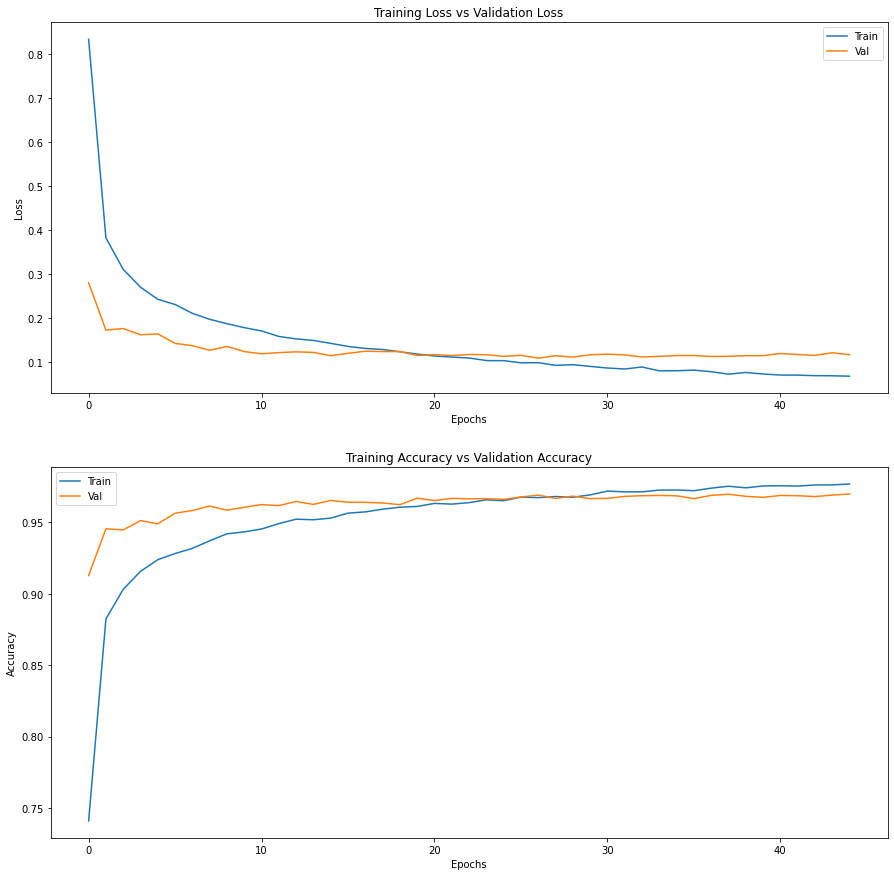

In [20]:
plot_history(alex_history, 'alex')

C:\Users\marik\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


CNN 1: Epochs=45, Train accuracy=0.83920, Validation accuracy=0.89227


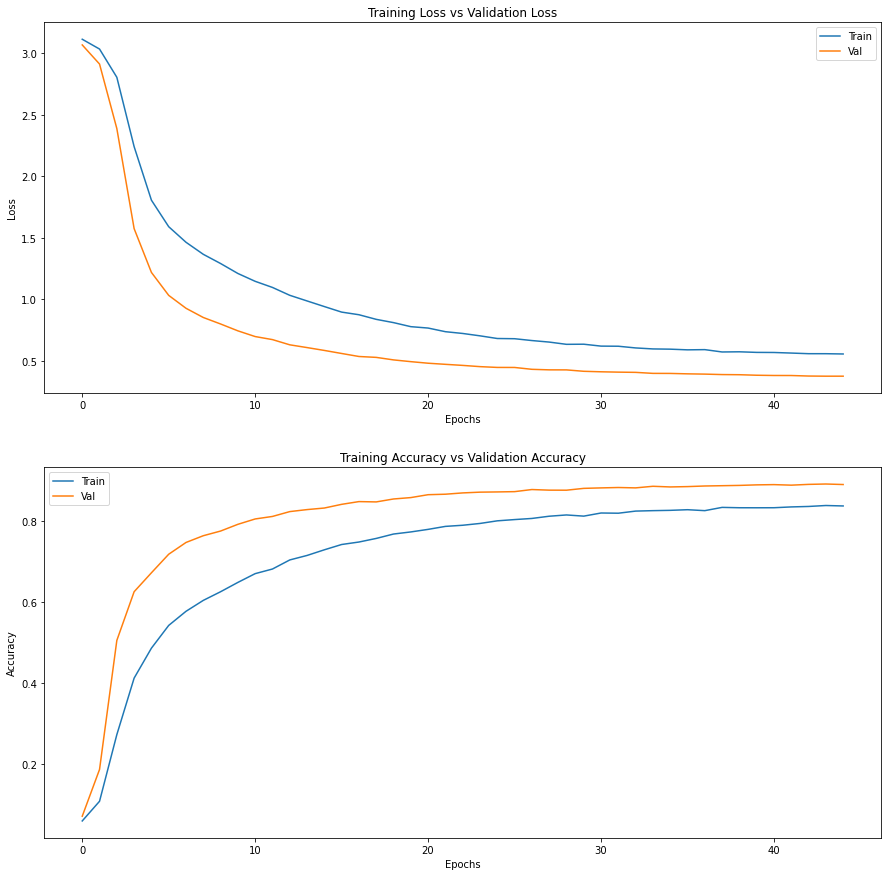

In [21]:
lenet_model, lenet_history = train_model(lenet_model)
plot_history(lenet_history, 'leNet')

CNN 1: Epochs=45, Train accuracy=0.96747, Validation accuracy=0.97174


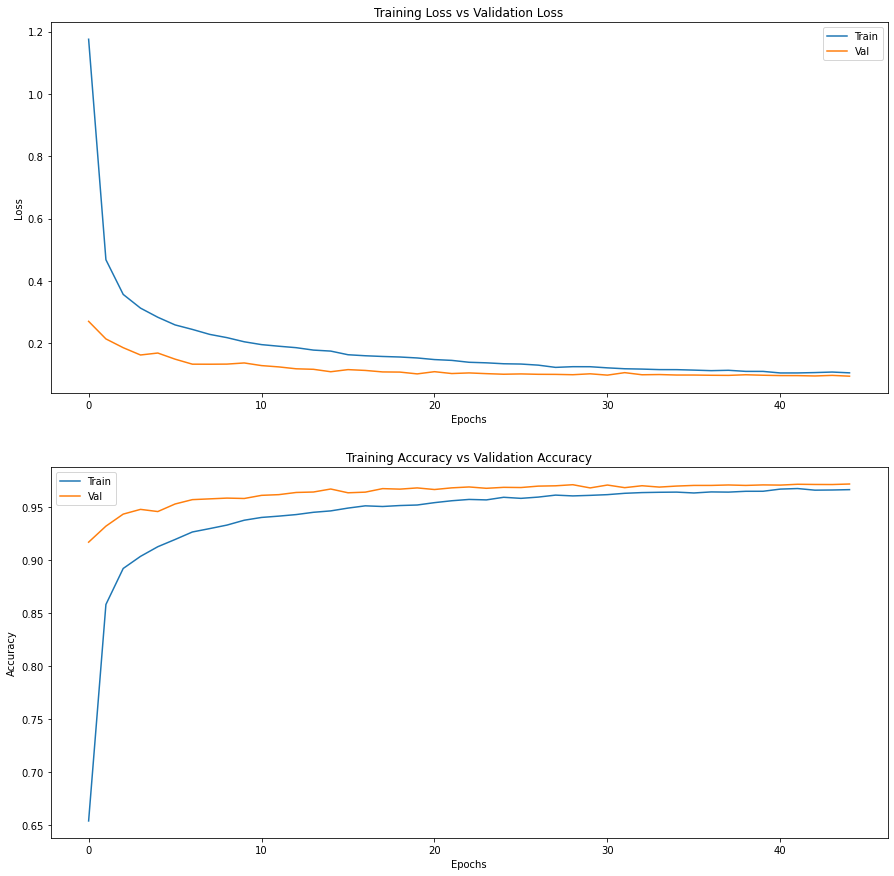

In [22]:
improved_lenet_model, imporved_lenet_history = train_model(improved_lenet_model)
plot_history(imporved_lenet_history, 'improved_lenet')

In [23]:
alex_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        1

In [24]:
improved_lenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)       